
--- COMPARACIÓN DE PERSPECTIVAS ---

1️⃣ Top 5 por Brecha ABSOLUTA (Diferencia de puntos):
AREA             URBANO      RURAL  BRECHA_ABSOLUTA
DEPARTAMENTO                                       
Córdoba       67.741452  16.813765        50.927688
Arauca        73.122215  22.443288        50.678927
La Guajira    63.054085  12.938593        50.115492
Meta          66.742886  17.367971        49.374915
Caquetá       55.019872   6.577603        48.442269

2️⃣ Top 5 por Brecha RELATIVA (Donde la desigualdad es más severa):
AREA          URBANO  RURAL  BRECHA_RELATIVA
DEPARTAMENTO                                
Amazonas       37.09   0.00           100.00
Guainía        16.49   0.00           100.00
Vichada        10.69   0.00           100.00
Vaupés         18.96   0.00           100.00
Caquetá        55.02   6.58            88.05


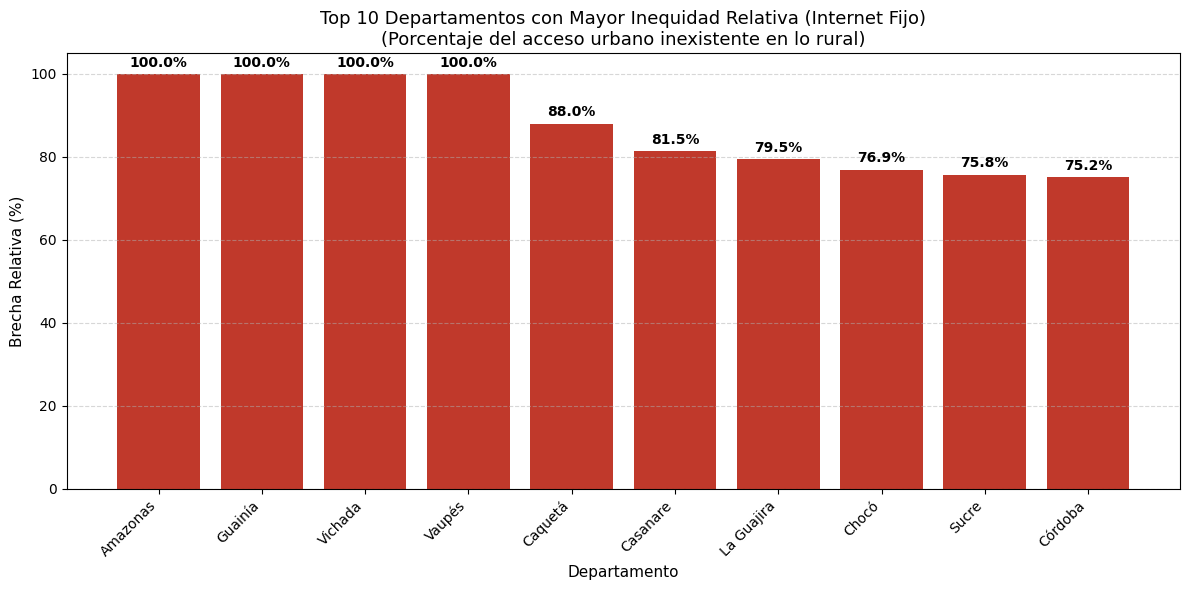

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# CÁLCULO AVANZADO DE BRECHA (ABSOLUTA VS RELATIVA)

try:
    df_raw = pd.read_excel(ARCHIVO_DATOS, sheet_name=NOMBRE_HOJA, header=3)
    
    # 2. LIMPIEZA
    col_tasa = df_raw.columns[18] 
    
    df_raw.rename(columns={
        df_raw.columns[0]: 'DEPARTAMENTO',
        df_raw.columns[1]: 'AREA',
        col_tasa: 'TASA_ACCESO_FIJO'
    }, inplace=True)

    df_raw['DEPARTAMENTO'] = df_raw['DEPARTAMENTO'].ffill()
    df_raw['TASA_ACCESO_FIJO'] = pd.to_numeric(df_raw['TASA_ACCESO_FIJO'], errors='coerce')
    
   #FILTRAR
    df_limpio = df_raw[df_raw['AREA'].isin(['Cabecera', 'Centros poblados y rural disperso'])].copy()
    df_limpio.dropna(subset=['TASA_ACCESO_FIJO'], inplace=True)
    
    df_pivot = df_limpio.pivot(index='DEPARTAMENTO', columns='AREA', values='TASA_ACCESO_FIJO')
    df_pivot.rename(columns={'Cabecera': 'URBANO', 'Centros poblados y rural disperso': 'RURAL'}, inplace=True)
    df_pivot.dropna(subset=['URBANO', 'RURAL'], inplace=True)

#3 CÁLCULOS
    
    # A) Brecha Absoluta ¿cuántos puntos porcentuales de diferencia hay?.
    df_pivot['BRECHA_ABSOLUTA'] = df_pivot['URBANO'] - df_pivot['RURAL']

    # B) Brecha Relativa (Índice de Inequidad)
    # Fórmula: (Urbano - Rural) / Urbano. nos dice ¿Qué porcentaje del logro urbano le falta al campo?
    df_pivot['BRECHA_RELATIVA'] = (
        (df_pivot['URBANO'] - df_pivot['RURAL']) / df_pivot['URBANO']
    ) * 100

    # 4. RESULTADOS COMPARATIVOS
    
    # Top 5 Brecha Absoluta (Los de siempre)
    top_absoluta = df_pivot.sort_values('BRECHA_ABSOLUTA', ascending=False).head(5)
    
    # Top 5 Brecha Relativa (Los estructuralmente olvidados)
    top_relativa = df_pivot.sort_values('BRECHA_RELATIVA', ascending=False).head(5)

    print("\n--- COMPARACIÓN DE PERSPECTIVAS ---")
    print("\n1️⃣ Top 5 por Brecha ABSOLUTA (Diferencia de puntos):")
    print(top_absoluta[['URBANO', 'RURAL', 'BRECHA_ABSOLUTA']])
    
    print("\n2️⃣ Top 5 por Brecha RELATIVA (Donde la desigualdad es más severa):")
    print(top_relativa[['URBANO', 'RURAL', 'BRECHA_RELATIVA']].round(2))

    # 5. VISUALIZACIÓN POTENCIADA (Graficamos la Relativa)
    plt.figure(figsize=(12, 6))
    
    # Vamos a graficar el Top 10 de Brecha Relativa para ver el impacto
    grafico_data = df_pivot.sort_values('BRECHA_RELATIVA', ascending=False).head(10)
    
    barras = plt.bar(grafico_data.index, grafico_data['BRECHA_RELATIVA'], color='#C0392B')
    
    plt.title('Top 10 Departamentos con Mayor Inequidad Relativa (Internet Fijo)\n(Porcentaje del acceso urbano inexistente en lo rural)', fontsize=13)
    plt.ylabel('Brecha Relativa (%)', fontsize=11)
    plt.xlabel('Departamento', fontsize=11)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Etiquetas
    for barra in barras:
        altura = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, altura + 1, 
                 f'{altura:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"❌ Error: {e}")